# TCDF: Temporal Causal Discovery Framework

This notebook shows the functionality of TCDF. 

See the corresponding paper for more detail: __["Causal Discovery with Attention-Based Convolutional Neural Networks"](https://www.mdpi.com/2504-4990/1/1/19)__.

In [1]:
"""Shows all argument options"""

%run -i "runTCDF.py" --help

usage: runTCDF.py [-h] [--cuda] [--epochs EPOCHS] [--kernel_size KERNEL_SIZE]
                  [--hidden_layers HIDDEN_LAYERS]
                  [--learning_rate LEARNING_RATE] [--optimizer {Adam,RMSprop}]
                  [--log_interval LOG_INTERVAL] [--seed SEED]
                  [--dilation_coefficient DILATION_COEFFICIENT]
                  [--significance SIGNIFICANCE] [--plot]
                  (--ground_truth GROUND_TRUTH | --data DATA [DATA ...])

TCDF: Temporal Causal Discovery Framework

options:
  -h, --help            show this help message and exit
  --cuda                Use CUDA (GPU) (default: False)
  --epochs EPOCHS       Number of epochs (default: 1000)
  --kernel_size KERNEL_SIZE
                        Size of kernel, i.e. window size. Maximum delay to be
                        found is kernel size - 1. Recommended to be equal to
                        dilation coeffient (default: 4)
  --hidden_layers HIDDEN_LAYERS
                        Number of hidden lay

To demonstrate the Temporal Causal Discovery Framework, we apply TCDF to a small dataset (`demo_dataset.csv`). This dataset contains 4 timeseries (called `Timeser0`,`Timeser1`,`Timeser2` and `Timeser3`), all containing 4,000 time steps. `Timeser0` and `Timeser3`contain random values. A value of `Timeser1` at timestep `t` is generated based on timestep `t-1` of `Timeser0` plus some noise. Therefore, `Timeser1` is caused by `Timeser0` with a delay of 1 time step. A value of `Timeser2` at timestep `t` is generated based on timestep `t-2` of `Timeser1` plus some noise. Therefore, `Timeser2` is caused by `Timeser1` with a delay of 2 time steps. File `demo_groundtruth` contains the ground truth, i.e. it tells that there is a causal relationship from `Timeser0` to `Timeser1` with a delay of 1 time step, and a causal relationship from `Timeser1` to `Timeser2` with a delay of 2 time steps.

Arguments: Namespace(cuda=True, epochs=1000, kernel_size=4, hidden_layers=3, learning_rate=0.01, optimizer='Adam', log_interval=500, seed=1111, dilation_coefficient=4, significance=0.5, plot=True, ground_truth=None, data=['data/挤出机数据-1.CSV'])

 Dataset:  挤出机数据-1.CSV

 Analysis started for target:  Extruder 1 current
Epoch:  1 [0%] 	Loss: 1.015841
Epoch: 500 [50%] 	Loss: 0.363959
Epoch: 1000 [100%] 	Loss: 0.205525
Potential causes:  [6, 0, 4]
Validated causes:  [0]

 Analysis started for target:  Extruder speed
Epoch:  1 [0%] 	Loss: 1.015013
Epoch: 500 [50%] 	Loss: 0.025272
Epoch: 1000 [100%] 	Loss: 0.018295
Potential causes:  [1, 4]
Validated causes:  []

 Analysis started for target:  Extruder 1 head pressure
Epoch:  1 [0%] 	Loss: 1.015047
Epoch: 500 [50%] 	Loss: 0.052341
Epoch: 1000 [100%] 	Loss: 0.037028
Potential causes:  [1, 4]
Validated causes:  []

 Analysis started for target:  Extruder 1 head temperature
Epoch:  1 [0%] 	Loss: 1.015072
Epoch: 500 [50%] 	Loss: 0.002508
Epoch: 10

) missing from current font.onda3/envs/ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


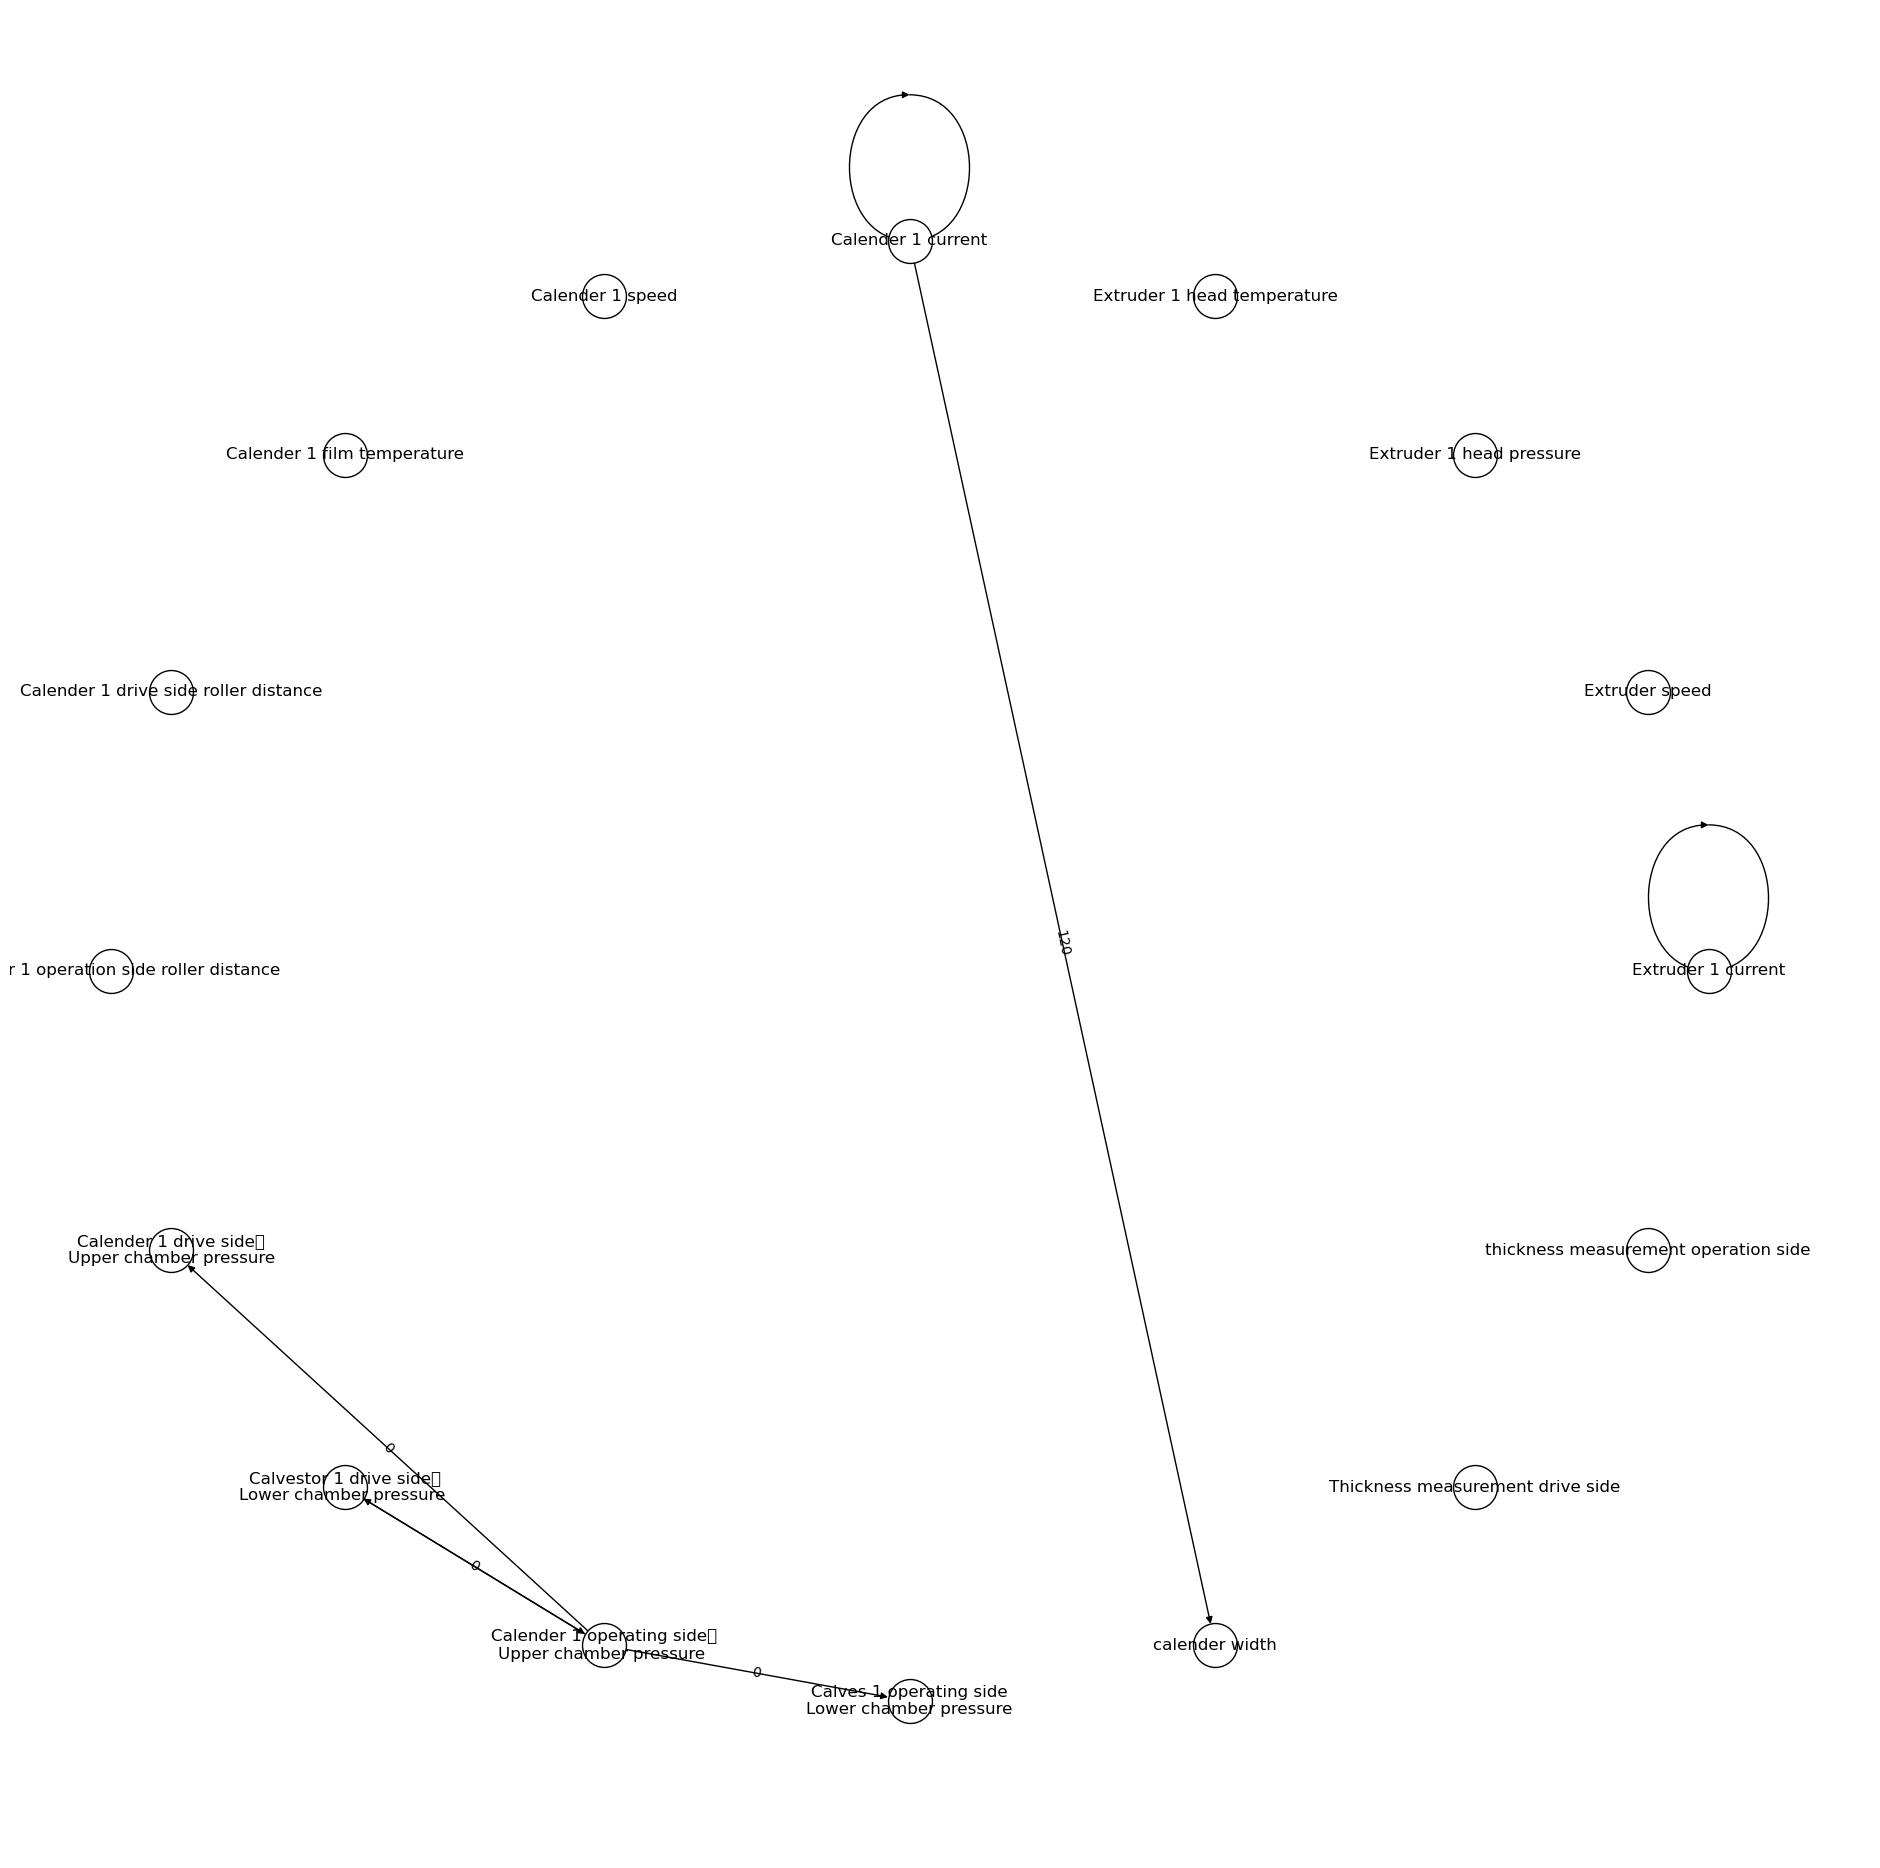

<Figure size 640x480 with 0 Axes>

In [2]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --data data/挤出机数据-1.CSV --cuda --hidden_layers 3 --significance 0.5 --plot --epochs 1000



Arguments: Namespace(cuda=True, epochs=500, kernel_size=4, hidden_layers=0, learning_rate=0.01, optimizer='Adam', log_interval=250, seed=1111, dilation_coefficient=4, significance=0.8, plot=True, ground_truth={'data/demo_dataset.csv': 'data/demo_groundtruth.csv'}, data=None)

 Dataset:  demo_dataset.csv

 Analysis started for target:  Timeser0
Epoch:  1 [0%] 	Loss: 2.315027
Epoch: 250 [50%] 	Loss: 1.697025
Epoch: 500 [100%] 	Loss: 1.695515
Potential causes:  [1, 2]
Validated causes:  []

 Analysis started for target:  Timeser1
Epoch:  1 [0%] 	Loss: 4.291189
Epoch: 250 [50%] 	Loss: 0.002199
Epoch: 500 [100%] 	Loss: 0.002134
Potential causes:  [0]
Validated causes:  [0]

 Analysis started for target:  Timeser2
Epoch:  1 [0%] 	Loss: 1.740447
Epoch: 250 [50%] 	Loss: 0.365181
Epoch: 500 [100%] 	Loss: 0.364763
Potential causes:  [1, 0]
Validated causes:  [1]

 Analysis started for target:  Timeser3 
Epoch:  1 [0%] 	Loss: 2.264087
Epoch: 250 [50%] 	Loss: 1.658579
Epoch: 500 [100%] 	Loss: 1.65

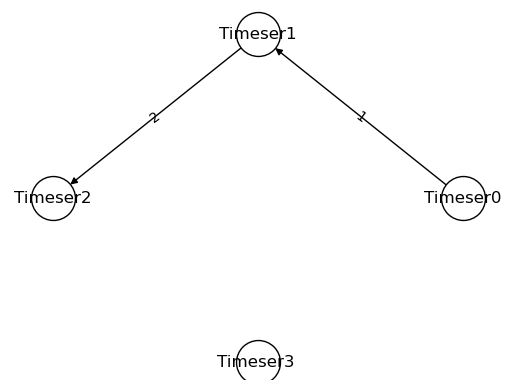

<Figure size 640x480 with 0 Axes>

In [4]:
"""Run TCDF and evaluate by comparing the results to the ground truth"""
%matplotlib inline
%run -i "runTCDF.py" --ground_truth data/demo_dataset.csv=data/demo_groundtruth.csv  --epochs 500 --log_interval 250 --plot --cuda

Arguments: Namespace(cuda=True, epochs=1000, kernel_size=4, hidden_layers=0, learning_rate=0.01, optimizer='Adam', log_interval=500, seed=1111, dilation_coefficient=4, plot=True, train_test_split=0.8, data=['data/挤出机数据-1.CSV'])

 Analysis started for target:  Extruder 1 current
Epoch:  1 [0%] 	Loss: 1.102783
Epoch: 500 [50%] 	Loss: 0.255875
Epoch: 1000 [100%] 	Loss: 0.229081

 Analysis started for target:  Extruder speed
Epoch:  1 [0%] 	Loss: 1.213751
Epoch: 500 [50%] 	Loss: 0.032560
Epoch: 1000 [100%] 	Loss: 0.026785

 Analysis started for target:  Extruder 1 head pressure
Epoch:  1 [0%] 	Loss: 1.218964
Epoch: 500 [50%] 	Loss: 0.113488
Epoch: 1000 [100%] 	Loss: 0.049469

 Analysis started for target:  Extruder 1 head temperature
Epoch:  1 [0%] 	Loss: 1.126310
Epoch: 500 [50%] 	Loss: 0.036079
Epoch: 1000 [100%] 	Loss: 0.030637

 Analysis started for target:  Calender 1 current
Epoch:  1 [0%] 	Loss: 1.198210
Epoch: 500 [50%] 	Loss: 0.004238
Epoch: 1000 [100%] 	Loss: 0.002271

 Analysis 

/mnt/home/jiangfengrui/miniconda3/envs/ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25380 (\N{CJK UNIFIED IDEOGRAPH-6324}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/home/jiangfengrui/miniconda3/envs/ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/home/jiangfengrui/miniconda3/envs/ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/home/jiangfengrui/miniconda3/envs/ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/home/jiangfengrui/miniconda3/envs/ML/lib/python3.11/site-packages/IPython/c

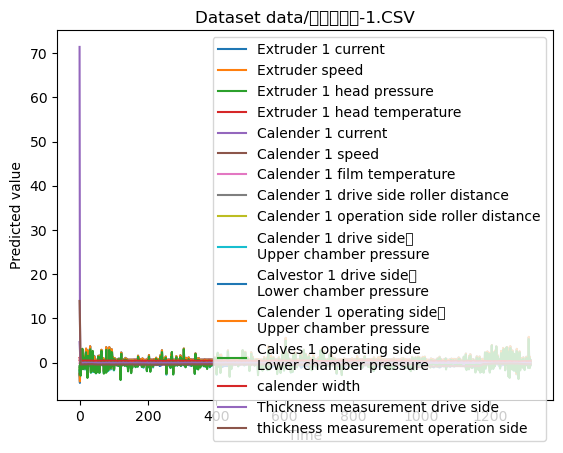

<Figure size 640x480 with 0 Axes>

In [5]:
"""Evaluates the prediction accuracy of TCDF."""
"""For more information about MASE (Mean Absolute Scaled Error), see https://otexts.org/fpp2/accuracy.html"""

%matplotlib inline
%run -i "evaluate_predictions_TCDF.py" --data data/挤出机数据-1.CSV --plot --cuda